In [101]:
# fantasy calculator (modified pt2 of sta 141b final project)
import requests
import pandas as pd
import numpy as np
import lxml.html as lx
from lxml import html
import requests_cache
requests_cache.install_cache("cache")
import re 
from bs4 import BeautifulSoup
import time
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import warnings
import os
from statsmodels.stats.diagnostic import het_breuschpagan as bp
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import plotnine as p9
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
warnings.filterwarnings('ignore')


## Defining Web Scraping Functions

In [102]:
years = list(range(2002,2022))
spotrac_password = os.environ['spotrac_password']

def get_salary(year, pos):
        """Function that scrapes the salary of each WR player for a certain year from Spotrac. Make sure to click out of the advertisement on the login page manually if it pops up.
        Parameters:
                year(int): year that you want scraped
                pos(str): position you want scraped (wide receiver or quarterback or running back)
        
        """
        
        driver = webdriver.Chrome('path/to/chromedriver')
        email = '''
        password = '''
        driver.get('https://www.spotrac.com/signin/') 
        
        if pos == "wr":
                pos = 'wide-receiver'
        elif pos == 'qb':
                pos = 'quarterback'
        else:
                pos = str(pos)

        driver.find_element(By.ID, "email").send_keys(email)
        driver.find_element(By.ID, "password").send_keys(password)
        button = driver.find_element(By.XPATH, "//input[@type = 'submit']")
        button.click()
       
        time.sleep(0.5)
        for i in range(len(pos) - 1):
                #url = 'https://www.spotrac.com/nfl/rankings/' + str(year) + '/average/wide-receiver/'
                url = 'https://www.spotrac.com/nfl/salaries/breakdown/' + str(year) + '/' + str(pos) + '/'
                driver.get(url)        
                
                
                req = requests.get(url)
                gg = pd.read_html(req.text)
                box = gg[0]
                box1 = box[['Player', 'Average Salary']]
                box1 = box1.reset_index(drop = True)
                box1 = box1.rename(columns=lambda x: x if not 'Unnamed' in str(x) else '')
                
        box1['Year'] = year 

        return box1

        data = {
        'ajax': 'true',
        'mobile': 'false'
        }
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        #soup = BeautifulSoup(requests.post(url, data=data).content, 'html.parser')

        a = []
        sal = soup.find_all('table', {'class': 'datatable rtable tablesorter tablesorter-default tablesorter0cd183cc13cda'})
        #for s in sal:
                #pattern = 
        

        a = []
        for tag in soup.select(".team-name"):
                a = a + [tag.text]
                
        b = []
        for tag in soup.select(".rank-value"):
                b = b + [tag.text.replace(' ', '')]

        b = b[1:]

        c = []
        for tag in soup.select('td.center.med'):
                c = c + [tag.text.replace('\n', '').replace(' ', '')]
                
        #percentile_list = pd.DataFrame(
        #{'Name': a,
        #'Position': c,
        #'Salary': b,
        #'Year': year
        #})

        return sal

get_salary(2015, 'qb')

,Player,Average Salary,Year
,,Average Salary,
0,Philip Rivers,"$20,812,500",2015
1,Robert Griffin III,"$5,279,775",2015
2,Nick Foles,"$12,270,000",2015
3,Chad Henne,"$4,000,000",2015
4,Bruce Gradkowski,"$1,650,000",2015
5,Kellen Clemens,"$1,500,000",2015
6,Mike Glennon,"$776,016",2015
7,Garrett Grayson,"$850,151",2015
8,Matt Barkley,"$684,882",2015


In [103]:
def draft_player(year): 
    """Function scrapes draft position and player position for a given year
    Parameters:
            year(int): year that you want scraped
    
    """
    url_round = 'https://www.pro-football-reference.com/years/' + str(year) + '/draft.htm'

    soup = BeautifulSoup(requests.get(url_round).content, 'lxml')
    pick = soup.find_all('td', {'data-stat': 'draft_pick'})
    name = soup.find_all('td', {'data-stat': 'player'})
    pos = soup.find_all('td', {'data-stat': 'pos'})
    r1 = []
    r2 = []
    r3 = []

    time.sleep(1)

    name_lst = []
    names = []
    pick_lst = []
    picks = []
    pos_lst = []
    position = []

    for p in pick:
        pattern = '"\d+'
        r1.append(re.findall(pattern, str(p)))
        #r11 = [re.sub()]
    
    for n in name:
        if year > 2010:
            pattern = 'htm">.*a'
            r2.append(re.findall(pattern, str(n)))
        else:
            pattern = '\>(.*?)\<'
            r2.append(re.findall(pattern, str(n)))
    
    for s in pos:
        pattern = 's">*..'
        r3.append(re.findall(pattern, str(s)))

    for i in range(len(r2)):
        
        pattern_name = "(?<=>)(.*?)(?=</)" #regex expression to extract player name 
        pattern_pos = "(?<=>)(.*)(?=')" 
        pattern_pick = ""
        if year < 2011:
            new_pattern = '[^a-zA-Z]+'
            name_lst.append(re.sub(new_pattern, ' ' ,str(r2[i]))) #
        else:
            name_lst.append(re.search(pattern_name, str(r2[i])))

        if name_lst[i] is None:
            return name_lst[i]
        
        if year > 2010:
            names.append(name_lst[i].group(1))
        else:
            names.append(name_lst[i])

        pos_lst.append(re.search(pattern_pos, str(r3[i])))
        position.append(pos_lst[i].group(1))

        #len_name - 2


    #for p in pos:
        
    
    #for p in name:
        #poi.append(p['href'])
    #for x in pick:
        #q = x.text
    #pick = []
    #for p in soup.select('pick'):
        #print(p.get('aria-label'))
        # pick = pick + [p.text.replace('\n','')]
    
    wr_picks = pd.DataFrame(
        {'Name': names,
        'Position': position,
        'Pick Number': list(range(len(r1))),
        'Year': year
        })
    
    wr_picks = wr_picks.replace(r'\\', '', regex = True)
    pick_nums = wr_picks[wr_picks['Position'] == 'WR']
    
    return pick_nums
#x = stuff(1980)
#print(x)




In [104]:
def fantasy_stats(year, pos):
    """Function will scrape fantasy pros for the fantasy stats of a given position.
    Parameters:
                year(int): year that you want scraped
                pos(str): position you want scraped
    
    """
    player_url = 'https://www.fantasypros.com/nfl/stats/'+ pos +'.php?year=' + str(year) +  '&scoring=PPR'
    df = pd.DataFrame()
    pos_list = [] # list to hold scraped information
    fpoints_list = []
    num_receptions = []
    tgt_rec_yds = []
    yds = []
    long_recep = []
    rec_touchdown = []
    rush_attempts = []
    rush_yards = []
    num_games = []

    response = requests.get(player_url) 
    html = lx.fromstring(response.text)
    pos_list.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[2]/a[1]/text()')) # extract position from scraped info
    fpoints_list.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[16]/text()')) # look at /td[x]
    num_receptions.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[3]/text()'))
    tgt_rec_yds.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[4]/text()'))
    yds.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[5]/text()'))
    long_recep.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[6]/text()'))
    rec_touchdown.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[8]/text()'))
    rush_attempts.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[9]/text()'))
    rush_yards.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[10]/text()'))
    num_games.append(html.xpath('//*[@id="data"]/tbody/tr[*]/td[14]/text()'))

    # All the players and their points each season

    all_players = []
    f_points = []
    receptions = []
    tgt_yds = []
    total_yds = []
    longest_reception = []
    total_rec_touchdown = []
    total_rush_attempts = []
    total_rush_yards = []
    total_games = []

    for player in pos_list: 
        for p in player:
            all_players.append(p)

    for points in fpoints_list: 
        for pnt in points:
            f_points.append(pnt)

    for catch in num_receptions: 
        for c in catch:
            receptions.append(c)

    for target in tgt_rec_yds: 
        for t in target:
            tgt_yds.append(t)

    for yard in yds: 
        for y in yard:
            total_yds.append(y)

    for reception in long_recep: 
        for r in reception:
            longest_reception.append(r)
    
    for touchdown in rec_touchdown: 
        for t in touchdown:
            total_rec_touchdown.append(t)

    for rush in rush_attempts: 
        for run in rush:
            total_rush_attempts.append(run)

    for rushing in rush_yards: 
        for ry in rushing:
            total_rush_yards.append(ry)

    for num in num_games: 
        for n in num:
            total_games.append(n)

       

    df = pd.DataFrame(all_players,columns=['Name'])
    df['Fantasy Points'] = f_points
    df['Number of Receptions'] = receptions
    df['Target Receiving Yards'] = tgt_yds
    df['Total Receiving Yards'] = total_yds
    df['Longest Reception (yds)'] = longest_reception 
    df['Touchdowns Scored'] = total_rec_touchdown 
    df['Number of Rushing Attempts'] = total_rush_attempts
    df['Total Rushing Yards'] = total_rush_yards
    df['Games Played'] = total_games
    df['Year'] = year
    pat=r'(\,|\.| Jr| II| I|\'| V| IV| Sr| III|iam)' 
    df['Name'] = df['Name'].replace(pat,'',regex=True) # get rid of surnames/extra fittings to name for later analysis

    return df

#print(df.to_string())


## Scraping Infomation

In [107]:
i = 0
percentile_list = [] # get salaries of all wide receivers who played from 2002-2022
while i < 20:
    percentile_list.append(get_salary(year = years[i], pos = 'wr'))
    i += 1

for i in range(len(percentile_list)):
    percentile_list[i] = percentile_list[i].rename(columns = {percentile_list[i].columns[-2]: 'Salary'})

percentile_list

[                 Player Average Salary  Year
                         Average Salary      
 0         Terrell Owens     $5,000,000  2002
 1       Muhsin Muhammad     $4,500,000  2002
 2         Rocket Ismail     $3,000,000  2002
 3           Eric Moulds     $6,248,167  2002
 4         Wayne Chrebet     $2,405,440  2002
 5             Tim Brown     $2,172,562  2002
 6      Keyshawn Johnson     $6,687,500  2002
 7            Randy Moss     $8,284,375  2002
 8             Rod Smith     $5,936,429  2002
 9         Joey Galloway     $6,000,000  2002
 10          Issac Bruce     $6,000,000  2002
 11             Joe Horn     $2,800,000  2002
 12        Peter Warrick     $2,435,714  2002
 13        Derrick Mason     $4,350,000  2002
 14      Marvin Harrison     $5,100,000  2002
 15           Hines Ward     $2,082,813  2002
 16           Torry Holt     $2,000,000  2002
 17      Plaxico Burress     $1,733,750  2002
 18         David Boston     $1,750,250  2002
 19        Travis Taylor     $1,49

In [ ]:
lst = []
for x in range(2002,2022):
    lst.append(fantasy_stats(x, 'wr'))

lst

[                Name Fantasy Points Number of Receptions  \
 0    Marvin Harrison           24.0                  143   
 1         Hines Ward           20.9                  112   
 2      Terrell Owens           23.0                  100   
 3         Randy Moss           18.1                  106   
 4        Eric Moulds           18.1                  100   
 ..               ...            ...                  ...   
 177      Kahlil Hill           -2.0                    0   
 178   Tamarickanover           -0.3                    0   
 179     Damon Gibson           -1.0                    0   
 180     Frank Murphy           -0.5                    0   
 181       Nick Davis           -0.2                    0   
 
     Target Receiving Yards Total Receiving Yards Longest Reception (yds)  \
 0                      205                 1,722                    12.0   
 1                      161                 1,329                    11.9   
 2                      159        

In [108]:
pick_lst = []
for i in range(2002,2022):
    pick_lst.append(draft_player(i))

pick_lst

[                    Name Position  Pick Number  Year
 12     Donte Stallworth        WR           12  2002
 18         Ashley Lelie        WR           18  2002
 19         Javon Walker        WR           19  2002
 32        Jabar Gaffney        WR           32  2002
 35            Josh Reed        WR           35  2002
 45           Tim Carter        WR           45  2002
 46          Andre Davis        WR           46  2002
 47       Reche Caldwell        WR           47  2002
 61    Antwaan Randle El        WR           61  2002
 62       Antonio Bryant        WR           62  2002
 64         Deion Branch        WR           64  2002
 85       Marquis Walker        WR           85  2002
 86        Cliff Russell        WR           86  2002
 94          Eric Crouch        WR           94  2002
 122         Ron Johnson        WR          122  2002
 141       Terry Charles        WR          141  2002
 143        Herb Haygood        WR          143  2002
 148      Jason McAddley    

## Cleaning Data

In [109]:
pat=r'(\,|\.| Jr| II| I|\'| V| IV| Sr | III|iam)'

for i in range(len(percentile_list)):
    percentile_list[i]['Player'] = percentile_list[i]['Player'].replace(pat,'',regex=True)
    percentile_list[i]['Average Salary'] = percentile_list[i]['Average Salary'].replace('$','')
    percentile_list[i][~percentile_list[i].Player.str.contains("Totals")]
    percentile_list[i][~percentile_list[i].Player.str.contains("Average")]
    percentile_list[i] = percentile_list[i][~percentile_list[i]['Player'].isin(['Totals', 'Average'])]
    #percentile_list[i].columns = ['_'.join(x) for x in percentile_list[i].columns]
    percentile_list[i]['Average Salary'] = percentile_list[i]['Average Salary'].replace('$','')
    #percentile_list[i] = percentile_list[i].rename(columns = {'Player_': 'Player', 'Year_': 'Year'})
    print(percentile_list[i].to_string())

for i in range(len(percentile_list)):
    percentile_list[i].drop_duplicates()
    
asdf = percentile_list[0][['Average Salary']] 

percentile_list[0].to_csv('aaaa.csv')

for i in range(21):
    lst[i] = lst[i].rename(columns = {'Name':'Player'}) # rename name column to player
lst

               Player Average Salary  Year
                      Average Salary      
0       Terrell Owens     $5,000,000  2002
1     Muhsin Muhammad     $4,500,000  2002
2         Rocketsmail     $3,000,000  2002
3         Eric Moulds     $6,248,167  2002
4       Wayne Chrebet     $2,405,440  2002
5           Tim Brown     $2,172,562  2002
6    Keyshawn Johnson     $6,687,500  2002
7          Randy Moss     $8,284,375  2002
8           Rod Smith     $5,936,429  2002
9       Joey Galloway     $6,000,000  2002
10        Issac Bruce     $6,000,000  2002
11           Joe Horn     $2,800,000  2002
12      Peter Warrick     $2,435,714  2002
13      Derrick Mason     $4,350,000  2002
14    Marvin Harrison     $5,100,000  2002
15         Hines Ward     $2,082,813  2002
16         Torry Holt     $2,000,000  2002
17    Plaxico Burress     $1,733,750  2002
18       David Boston     $1,750,250  2002
19      Travis Taylor     $1,492,000  2002
20       Santana Moss     $1,878,104  2002
21        K

[              Player Fantasy Points Number of Receptions  \
 0    Marvin Harrison           24.0                  143   
 1         Hines Ward           20.9                  112   
 2      Terrell Owens           23.0                  100   
 3         Randy Moss           18.1                  106   
 4        Eric Moulds           18.1                  100   
 ..               ...            ...                  ...   
 177      Kahlil Hill           -2.0                    0   
 178   Tamarickanover           -0.3                    0   
 179     Damon Gibson           -1.0                    0   
 180     Frank Murphy           -0.5                    0   
 181       Nick Davis           -0.2                    0   
 
     Target Receiving Yards Total Receiving Yards Longest Reception (yds)  \
 0                      205                 1,722                    12.0   
 1                      161                 1,329                    11.9   
 2                      159        

In [114]:


o0203 = pd.merge(lst[0], lst[1], how = "outer") 
o0205 = pd.merge(pd.merge(o0203, lst[2], how = "outer"),lst[3], how = "outer")
o0207 = pd.merge(pd.merge(o0205, lst[4], how = "outer"),lst[5], how = "outer")
o0209 = pd.merge(pd.merge(o0207, lst[6], how = "outer"),lst[7], how = "outer")
o0213 = pd.merge(pd.merge(pd.merge(pd.merge(o0209, lst[8], how = "outer"),lst[9], how = "outer"), lst[10], how = "outer"), lst[11], how = 'outer')
o0217 = pd.merge(pd.merge(pd.merge(pd.merge(o0213, lst[12], how = "outer"),lst[13], how = "outer"), lst[14], how = "outer"), lst[15], how = 'outer')
o0222 = pd.merge(pd.merge(pd.merge(pd.merge(pd.merge(o0217, lst[16], how = "outer"),lst[17], how = "outer"), lst[18], how = "outer"), lst[19], how = 'outer'), lst[20], how = 'outer')
o0222['Total Receiving Yards'] = o0222['Total Receiving Yards'].replace({',':''}, regex = True) 
a = o0222

o023 = pd.merge(percentile_list[0], percentile_list[1], how = "outer") 
o025 = pd.merge(pd.merge(o023, percentile_list[2], how = "outer"),percentile_list[3], how = "outer")
o027 = pd.merge(pd.merge(o025, percentile_list[4], how = "outer"),percentile_list[5], how = "outer")
o029 = pd.merge(pd.merge(o027, percentile_list[6], how = "outer"),percentile_list[7], how = "outer")
o021_3 = pd.merge(pd.merge(pd.merge(pd.merge(o029, percentile_list[8], how = "outer"),percentile_list[9], how = "outer"), percentile_list[10], how = "outer"), percentile_list[11], how = 'outer')
o021_7 = pd.merge(pd.merge(pd.merge(pd.merge(o021_3, percentile_list[12], how = "outer"),percentile_list[13], how = "outer"), percentile_list[14], how = "outer"), percentile_list[15], how = 'outer')
o022_2 = pd.merge(pd.merge(pd.merge(pd.merge(o021_7, percentile_list[16], how = "outer"),percentile_list[17], how = "outer"), percentile_list[18], how = "outer"), percentile_list[19], how = 'outer')
#o022_2['Total Receiving Yards'] = o022_2['Total Receiving Yards'].replace({',':''}, regex = True) 
almost_there = o022_2.drop_duplicates()
almost_there.to_csv('temp.csv')

o23 = pd.merge(pick_lst[0], pick_lst[1], how = "outer") 
o25 = pd.merge(pd.merge(o23, pick_lst[2], how = "outer"),pick_lst[3], how = "outer")
o27 = pd.merge(pd.merge(o25, pick_lst[4], how = "outer"),pick_lst[5], how = "outer")
o29 = pd.merge(pd.merge(o27, pick_lst[6], how = "outer"),pick_lst[7], how = "outer")
o213 = pd.merge(pd.merge(pd.merge(pd.merge(o29, pick_lst[8], how = "outer"),pick_lst[9], how = "outer"), pick_lst[10], how = "outer"), pick_lst[11], how = 'outer')
o217 = pd.merge(pd.merge(pd.merge(pd.merge(o213, pick_lst[12], how = "outer"),pick_lst[13], how = "outer"), pick_lst[14], how = "outer"), pick_lst[15], how = 'outer')
o222_ = pd.merge(pd.merge(pd.merge(pd.merge(o217, pick_lst[16], how = "outer"),pick_lst[17], how = "outer"), pick_lst[18], how = "outer"), pick_lst[19], how = 'outer')
#o022_2['Total Receiving Yards'] = o022_2['Total Receiving Yards'].replace({',':''}, regex = True) 

fin_pick = o222_
fin_pick.rename(columns = {'Name': 'Player'}, inplace = True)
fin_pick['Year'] = fin_pick['Year'].astype(float)

In [115]:
almost_there = pd.read_csv('temp.csv', index_col=[0])
almost_there = pd.DataFrame(almost_there)
almost_there = almost_there.dropna()
almost_there.rename(columns = {'Player': 'Player', 'Average Salary':'Salary', 'Year':'Year'}, inplace = True)
#almost_there.colna
almost_there['Salary'] = almost_there['Salary'].str.replace('$','', regex = True)

almost_there["Salary"] = almost_there["Salary"].str.replace(',', '', regex = True)
almost_there

,Player,Salary,Year
0.0,Terrell Owens,5000000,2002.0
1.0,Muhsin Muhammad,4500000,2002.0
2.0,Rocketsmail,3000000,2002.0
3.0,Eric Moulds,6248167,2002.0
4.0,Wayne Chrebet,2405440,2002.0
...,...,...,...
1770.0,Rysen John,1490000,2021.0
1771.0,TJasher,810000,2021.0
1772.0,Quartney Davis,660000,2021.0
1773.0,David Sills,780000,2021.0


In [116]:
dataset_fake = pd.merge(almost_there, a, how = 'outer', on = ['Player', 'Year'])
#aap = dataset[0].append(dataset[4])

dataset = dataset_fake.dropna()
dataset # w/o pick numbers, 1330

regress_data = pd.merge(dataset, fin_pick, how = 'inner', on = ['Player', 'Year'])

regress_data = regress_data[regress_data.notna()]
regress_data = regress_data[regress_data['Salary'].notna()]
regress_data = regress_data[regress_data['Fantasy Points'].notna()]
regress_data  # df with 38

dataset['Fantasy Points'] = dataset['Fantasy Points'].astype(float)
dataset['Salary'] = dataset['Salary'].astype(float)
dataset['Salary']

0       5000000.0
1       4500000.0
3       6248167.0
4       2405440.0
5       2172562.0
          ...    
1759     610000.0
1772    3500000.0
1777     850000.0
1779     920000.0
1787     780000.0
Name: Salary, Length: 1310, dtype: float64

## Initial Plottings/Analysis

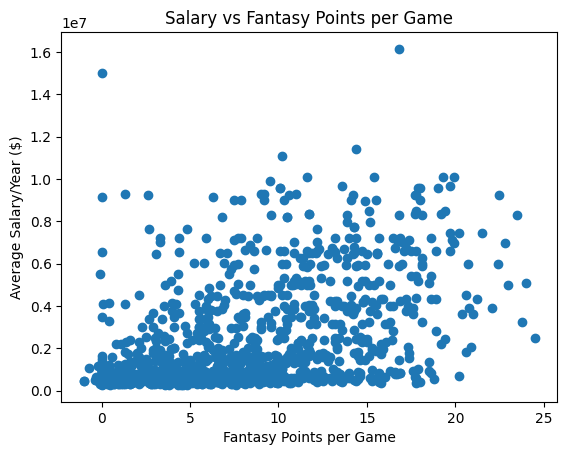

In [117]:
%matplotlib inline

plt.scatter(dataset['Fantasy Points'], dataset['Salary'])
plt.title('Salary vs Fantasy Points per Game')
plt.xlabel('Fantasy Points per Game')
plt.ylabel('Average Salary/Year ($)')
plt.show()

In [118]:
#regress_data["Salary"] = regress_data["Salary"].replace('\$', '', regex = True)
#egress_data["Salary"] = regress_data["Salary"].replace(',', '', regex = True)
#regress_data["Salary"] = regress_data["Salary"].astype(float)
#regress_data["Total Receiving Yards"] = regress_data["Total Receiving Yards"].replace(',', '', regex = True)
#regress_data = dataset
#b = regress_data[['Fantasy Points', 'Number of Receptions', 'Target Receiving Yards', 'Total Receiving Yards', 'Longest Reception (yds)', 'Touchdowns Scored', 'Number of Rushing Attempts', 'Total Rushing Yards', 'Games Played', 'Salary', 'Pick Number']]
b = regress_data[['Fantasy Points', 'Number of Receptions', 'Target Receiving Yards', 'Total Receiving Yards', 'Longest Reception (yds)', 'Touchdowns Scored', 'Number of Rushing Attempts', 'Total Rushing Yards', 'Games Played', 'Salary']]

b.astype(float).describe()

,Fantasy Points,Number of Receptions,Target Receiving Yards,Total Receiving Yards,Longest Reception (yds),Touchdowns Scored,Number of Rushing Attempts,Total Rushing Yards,Games Played,Salary
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.00000,35.000000,3.500000e+01
mean,4.554286,19.571429,34.914286,275.828571,10.057143,1.828571,1.657143,1.40000,9.514286,8.146307e+05
std,4.684414,21.504152,37.503232,318.617555,6.678027,4.162053,2.472708,2.19893,5.484585,7.311821e+05
min,-0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,3.900000e+05
25%,0.000000,0.500000,2.000000,3.500000,3.400000,0.000000,0.000000,0.00000,4.000000,5.448425e+05
50%,2.600000,11.000000,24.000000,163.000000,12.300000,0.000000,0.000000,0.00000,12.000000,6.260650e+05
75%,8.900000,36.500000,70.000000,511.500000,15.000000,0.000000,2.500000,2.50000,15.000000,6.937380e+05
max,15.500000,71.000000,121.000000,1046.000000,19.000000,16.000000,8.000000,9.00000,16.000000,4.045938e+06


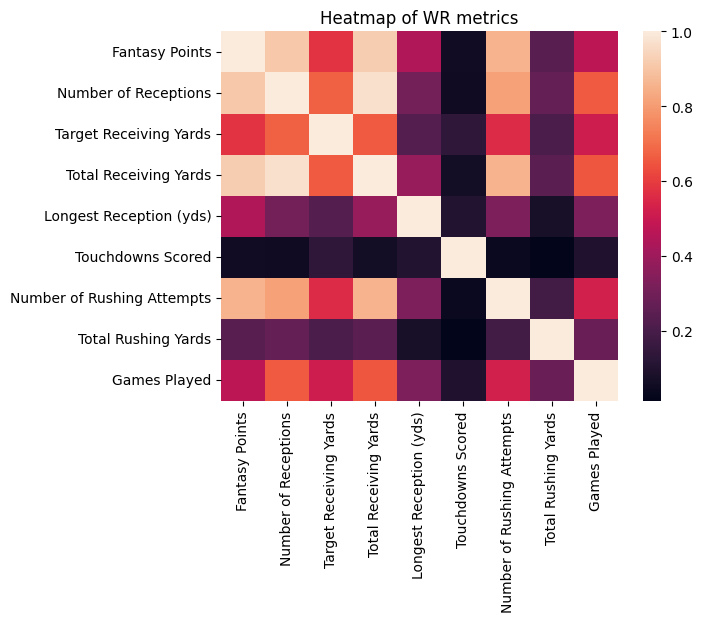

In [119]:
%matplotlib inline
heat_data = dataset
heat_data = heat_data.drop(["Salary", "Player", "Year"], axis = 1)
heat_data = heat_data.astype(float)


corr = heat_data.corr()
corr2 = sns.heatmap(corr)
plt.title("Heatmap of WR metrics")
plt.show()

## Model Creation for Predictions

In [120]:
model = linear_model.LinearRegression()
pt2_data = dataset
norm_sal = pt2_data["Salary"]
#pt2_data = regress_data.drop(["Name", "Year_x", "Position_x", "Year_y", "Position_y"], axis = 1) 
pt2_data['Log Salary'] = np.log(pt2_data['Salary'].astype(int))
#pt2_data = pt2_data.drop(["Salary", "Player", "Position"], axis = 1)
pt2_data = pt2_data.drop(["Salary", "Player"], axis = 1)
pt2_data = pt2_data.astype(float)
#aa2.apply(pd.to_numeric)
#gleem = smf.glm(formula = formula, data = apple, family = sm.families.Poisson(sm.families.links.log())).fit()
#print(gleem.summary())


y = pt2_data["Log Salary"]
x = pt2_data[['Number of Receptions', 'Target Receiving Yards', 'Total Receiving Yards', 'Longest Reception (yds)', 'Touchdowns Scored', 'Number of Rushing Attempts', 'Total Rushing Yards', 'Games Played']]
res_lst = []
log_unlog = [norm_sal, y]
for y in log_unlog:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
    #sns.pairplot(apple)
    #print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
    aw = model.fit(x_train, y_train)
    mods = sm.OLS(y, x)
    pred = model.predict(x_test)
    #sns.regplot(y = y_test, x = pred)
    aaa = model.score(x_train, y_train)
    #apple.corr()
    res = mods.fit()
    print(res.summary())
    res_lst.append(res)
    coefss = res.params


                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.573
Model:                            OLS   Adj. R-squared (uncentered):              0.570
Method:                 Least Squares   F-statistic:                              218.4
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                   2.08e-234
Time:                        02:48:11   Log-Likelihood:                         -20924.
No. Observations:                1310   AIC:                                  4.186e+04
Df Residuals:                    1302   BIC:                                  4.191e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

## Diagnostic Plots (check for linear regression violations)

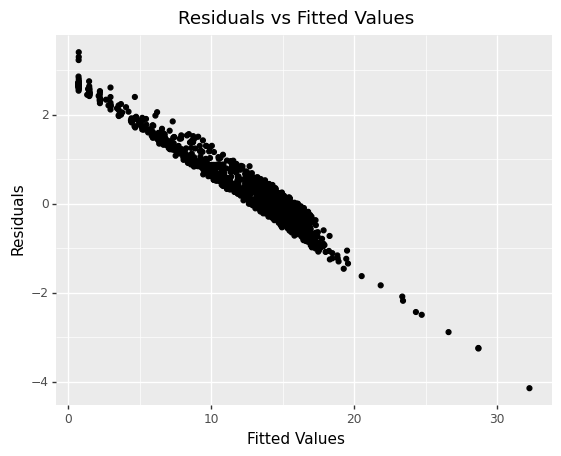

<ggplot: (143094762590)>

In [121]:
 (
    p9.ggplot(mapping = p9.aes(x = 'res.fittedvalues', y = 'res.resid_pearson')) +
    p9.geom_point() + 
    p9.labs(title = 'Residuals vs Fitted Values', x = "Fitted Values", y = "Residuals")
)




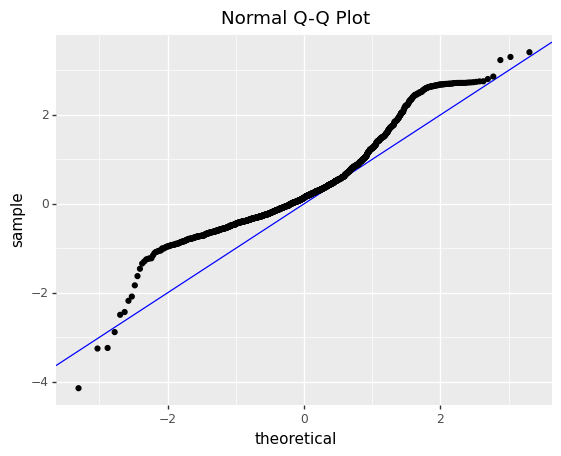

<ggplot: (143127139809)>

In [122]:
(
    p9.ggplot(mapping = p9.aes(sample = "res.resid_pearson")) +
    p9.geom_abline(p9.aes(intercept = 0, slope = 1), color = 'blue') +
    p9.stats.stat_qq() +
    p9.labs(title = 'Normal Q-Q Plot')
)

In [123]:
bp_test = bp(res.resid, x)
bp_test_names = ['Lagrange Multiplier Statistic', 'p-value from LMS', 'F statistic', 'p-value from F test']
ooo = zip(bp_test_names, bp_test)

var_factor = pd.DataFrame()
var_factor['variable'] = x.columns

var_factor["VIF"] = [vif(x.values, i) for i in range(len(x.columns))]

het = list(zip(bp_test_names, bp_test))

var_factor, het

(                     variable        VIF
 0        Number of Receptions  44.639220
 1      Target Receiving Yards   3.090368
 2       Total Receiving Yards  51.918852
 3     Longest Reception (yds)   4.714904
 4           Touchdowns Scored   1.078857
 5  Number of Rushing Attempts   6.547362
 6         Total Rushing Yards   1.312455
 7                Games Played   7.405657,
 [('Lagrange Multiplier Statistic', 131.47316007810315),
  ('p-value from LMS', 3.093736993926721e-25),
  ('F statistic', 18.15593508598356),
  ('p-value from F test', 6.133421449916596e-26)])

In [124]:
y3 = norm_sal

x3 = dataset[['Target Receiving Yards', 'Number of Receptions', 'Longest Reception (yds)', 'Touchdowns Scored', 'Number of Rushing Attempts', 'Total Rushing Yards']]
x3 = x3.astype(float)
y3 = y3.astype(float)

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3)
#sns.pairplot(apple)
#print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
aw3 = model.fit(x3_train, y3_train)
#x3 = sm.add_constant(x3)
mods3 = sm.OLS(y3, x3)
pred3 = model.predict(x3_test)
#sns.regplot(y = y_test, x = pred)
aaa3 = model.score(x3_train, y3_train)
#apple.corr()
res3 = mods3.fit()
print(res3.summary())

coefss = res3.params

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.572
Model:                            OLS   Adj. R-squared (uncentered):              0.570
Method:                 Least Squares   F-statistic:                              290.8
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                   2.13e-236
Time:                        02:48:12   Log-Likelihood:                         -20925.
No. Observations:                1310   AIC:                                  4.186e+04
Df Residuals:                    1304   BIC:                                  4.189e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [125]:
y3 = norm_sal

x3 = dataset[['Target Receiving Yards', 'Number of Receptions', 'Longest Reception (yds)', 'Touchdowns Scored', 'Number of Rushing Attempts', 'Total Rushing Yards']]
x3 = x3.astype(float)
y3 = y3.astype(float)

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.3)
#sns.pairplot(apple)
#print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
aw3 = model.fit(x3_train, y3_train)
#x3 = sm.add_constant(x3)
mods3 = sm.OLS(y3, x3)
pred3 = model.predict(x3_test)
#sns.regplot(y = y_test, x = pred)
aaa3 = model.score(x3_train, y3_train)
#apple.corr()
res3 = mods3.fit()
print(res3.summary())

coefss = res3.params

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.572
Model:                            OLS   Adj. R-squared (uncentered):              0.570
Method:                 Least Squares   F-statistic:                              290.8
Date:                Mon, 19 Jun 2023   Prob (F-statistic):                   2.13e-236
Time:                        02:48:12   Log-Likelihood:                         -20925.
No. Observations:                1310   AIC:                                  4.186e+04
Df Residuals:                    1304   BIC:                                  4.189e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

## Function to predict salary

In [128]:
def predict_salary(tgt_receive_yds: int, longest_reception: float, numb_touchdowns: int, numb_rushes: int, tot_rushes: int):
    ''' 
    Returns estimate of wide receiver salary.

        Parameters:
            tgt_receive_yds (int): Target Receiving Yards 
            longest_reception (float): Longest Reception
            numb_touchdowns (int): Number of Touchdowns
            numb_rushes (int): Number of Rushing Attempts
            tot_rushes (int): Total Rushing Yards
            

        Returns:
            salary (float): Estimated salary for a WR given their stats
    '''

    salary = (tgt_receive_yds * coefss[0]) + (longest_reception * coefss[1]) + (numb_touchdowns * coefss[2]) + (numb_rushes * coefss[3]) + (tot_rushes * coefss[4])   #+ (pick_numb * coefss[5])
    #soln = (np.log(tgt_receive_yds) * coefs[0])+ (np.log(longest_reception) * coefs[1]) + (np.log(numb_touchdowns) * coefs[3]) + (np.log(tot_rushes) * coefs[4]) +  (np.log(pick_numb) * coefs[5])
    
    output_message = "Based on the stats you entered, the estimated salary for this player is:"

    return output_message + " $" + "{:.2f}".format(float(salary))

predict_salary(95, 17.8, 0, 7, 6) 

'Based on the stats you entered, the estimated salary for this player is: $1323474.12'